# Klassifizierung

Bei der Analyse von Daten kann die Identifikation von Klassen, d.h. Gruppen oder Cluster von Datenpunkten, welche änhliche Eigenschaften haben, sehr hilfreich sein. Diese Strategie wird häufig in Situationen eingesetzt, in welchen die Daten eine hohe Dimensionalität aufweisen und so Strukturen für den Menschen schwer zu erkennen sind.

Die folgende Abbildung zeigt ein Beispiel mit drei Gruppen von Datenpunkten, welche eine Nähe bzgl. der abhängigen Größen $\sf A$ und $\sf B$ haben. Die visuelle Erkennung der Gruppen ist in diesem Fall für Menschen im Allgemeinen sehr einfach.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

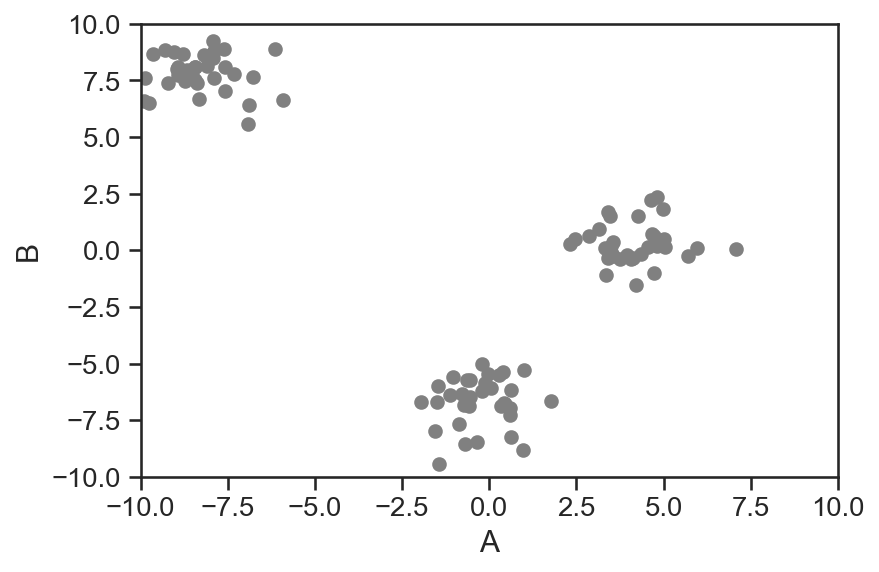

In [2]:
# Hier wird der nachfolgende Datensatz künstlich generiert. Die genutzte 
# Methode kommt aus dem Modul sklearn.datasets, siehe
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
# Durch die Festlegung der Zufallszahlfolge, mittels des Arguments
# random_state, wir so bei jedem Durchlauf der gleiche Datensatz generiert

import sklearn.datasets
x, c = sklearn.datasets.make_blobs(random_state=144)

plt.scatter(x[:,0], x[:,1], color='grey')

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel("A")
plt.ylabel("B");

Im Folgenden werden zwei Verfahren vorgestellt, welche eine automatische Erkennung von Grupppen oder Clustern durchführen können.

## k-Means-Algorithmus

Bei dem [k-Means-Algorithmus](https://de.wikipedia.org/wiki/K-Means-Algorithmus) handelt es sich um ein Verfahren um $\sf k$ Punkte zu finden, welche als Zentren von Clustern interpretiert werden können. Für alle Datenpunkte, welche zu einem Clusterzentrum $\sf \vec{\mu}_i$ gehören, gilt, dass sie diesem am nächsten sind. Bestimmt werden die Zentren $\sf \vec{\mu}_i$ über die Minimierung der folgenden Abstandsfunktion $\sf J$ für alle Datenpunkte $\sf \vec{x}_j$

$$
\sf J = \sum_{i=1}^k\sum_{\text{alle}\ \vec{x}_j} \left| \vec{x}_j - \vec{\mu}_i\right|^2
$$

Der k-Means-Algorithmus weist ein sehr einfaches und effizientes Verfahren zur Bestimmung der Clusterzentren auf. 
1. Es werden $\sf k$ (zufällige) Clusterzentren vorgegeben.
2. Für jeden Datenpunkt $\sf \vec{x}_j$ wird das nächstgelegene Clusterzentrum bestimmt.
3. Die Clusterzentren werden in die Mittelpunkte der ihnen zugewiesenen Menge von Datenpunkten verschoben.

Die Schritte 2 und 3 werden solange wiederholt bis sich die Abstandsfunktion $\sf J$ nicht mehr ändert, oder ein anderes Abbruchkriterium erfüllt ist.

Das Pythonmodul `sklearn` bzw. das Untermodul [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) enthält die Implementierungen diverser Cluster-Algorithmen, unter anderem die der hier vorgestellten. Dazu muss zunächst das entsprechende Modul geladen werden und ein Objekt der Klasse [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) erstellt werden. 

In [3]:
import sklearn.cluster

kmeans = sklearn.cluster.KMeans(n_clusters=3)

Dabei wird die Anzahl der zu suchenden Cluster mittels des `n_clusters` Arguments festgelegt, hier sollen also drei Cluster identifiziert werden. Die Datenpunkte aus obiger Abbildung sind in der Variablen `x` als ein Array gespeichert und haben folgende Form.

In [4]:
print(x.shape)

(100, 2)


Es sind 100 Zahlenpaare, da in diesem Beispiel jeder Datenpunkt nur durch zwei Eigenschaften bestimmt ist. Diese Daten werden nun genutzt, um nach dem oben aufgeführten Algorithmus die drei Clusterzentern zu finden. Dazu wird die Methode `fit()` aufgerufen, welche die Datenpunkte übergeben bekommt.

In [5]:
res = kmeans.fit(x)

Das `KMeans` Objekt enthält nun alle Informationen, wie z.B. die Positionen der Clusterzentren (`cluster_centers_`) oder die Zuweisung (`labels_`) jedes Datenpunktes zu einem Zentrum. 

In [6]:
print(kmeans.cluster_centers_)

[[ 4.15911301  0.32194317]
 [-8.25846604  7.81152655]
 [-0.25037619 -6.68466571]]


In [7]:
print(kmeans.labels_)

[0 2 0 2 2 0 2 2 2 1 2 1 2 2 0 1 1 1 1 2 2 1 1 0 2 1 2 2 2 2 2 1 2 1 0 1 2
 1 1 0 0 2 0 1 1 1 0 1 0 0 0 1 2 1 0 2 2 1 1 2 1 1 0 0 0 0 0 1 0 2 1 0 1 2
 0 0 0 1 2 2 2 1 0 1 2 2 2 0 0 0 1 0 0 2 0 1 0 1 1 0]


Die folgende Graphik zeigt die Datenpunkte, welche je nach Clusterzugehörigkeit eingefärbt sind, und die Zentren der Cluster.

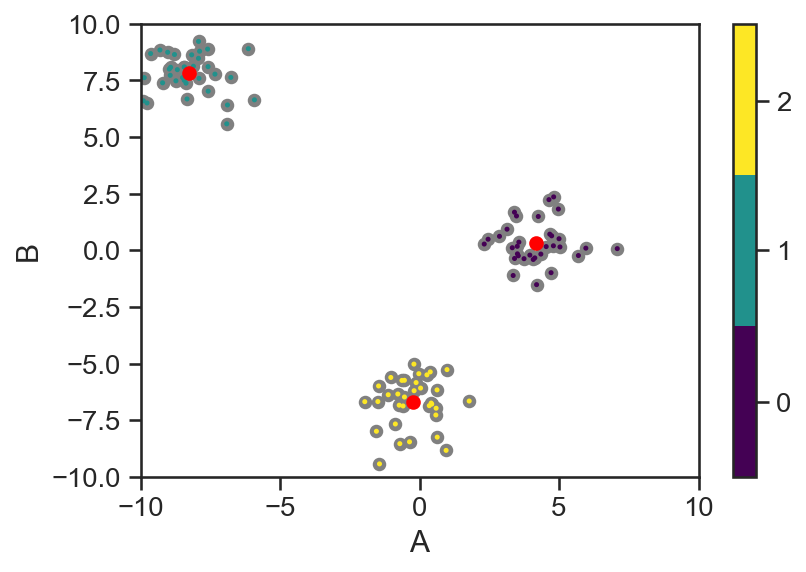

In [8]:
# In grau werden die Datenpunkte gezeichnet
plt.scatter(x[:,0], x[:,1], color='grey', s=30)

# Im folgenden wird eine Farbskala mit nur drei Werten erzeugt, dies dient nur der 
# besseren Darstellung
cmap3 = plt.cm.get_cmap('viridis', 3)

# Nun werden die Datenpunkte nochmals gezeichnet, jedoch kleiner als die grauen Punkte 
# und mit der Clusterzugehörigkeit, hier 0, 1 oder 2, eingefärbt
sct = plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, s=2, cmap=cmap3)

# In rot werden die Clusterzentren dargestellt
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')

# Achsenbeschriftung und Ausdehnung
plt.xlabel("A")
plt.ylabel("B")
plt.xlim([-10,10])
plt.ylim([-10,10])

# Diskrete Farbskala
cb = plt.colorbar(sct)
labels = [0,1,2]
loc = [0.33, 1, 1.66]
cb.set_ticks(loc)
cb.set_ticklabels(labels)

Neben der expliziten Zuweisung der vorhandenen Datenpunkte, ist es möglich eine Vorhersage über die Zuordnung anderer Punkte zu machen. Somit kann beispielsweise eine Karte erstellt werden, welche den gesamten Bereich entsprechend kennzeichnet.

In [9]:
# Generierung eines zweidimensionalen Datenpunktgitters
sxy = np.linspace(-10, 10, 1000)
mx, my = np.meshgrid(sxy, sxy)

# Vorhersage der Punktzugehörigkeit für die einzelnen Datenpunkte
# des Punktgitters
z = kmeans.predict(np.c_[mx.ravel(), my.ravel()])

# Umwandlung der Zugehörigkeiten in die gleiche Form wie das Gitter
z = z.reshape(mx.shape)

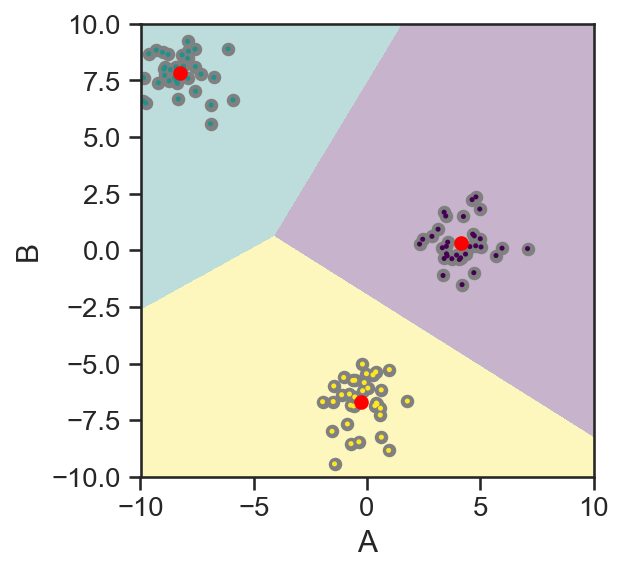

In [10]:
# Darstellung der Karte der Vorhergesagten Zugehörigkeiten
plt.imshow(z, cmap=cmap3, extent=[-10,10,-10,10], origin='lower', alpha=0.3)

# Darstellung der Datenpunkte und Clusterinformationen
plt.scatter(x[:,0], x[:,1], color='grey', s=30)
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, s=2, cmap=cmap3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')

# Beschriftungen 
plt.xlabel("A")
plt.ylabel("B")
plt.xlim([-10,10])
plt.ylim([-10,10]);

Der Verlauf der iterativen Suche nach den Clusterzentren kann exemplarisch durch die Einschränkung der maximalen Iterationen visualisiert werden. Dazu wird die `fit()` Funktion entsprechend oft aufgerufen und die gefundenen Zentren zwischengespeichert. 

In [11]:
# Maximale Größe der maximalen Iterationsschritte der fit() Funktion
n = 10

# Array für die Zwischenspeicherung der Clusterzentren
centers = np.zeros((n,3,2))

# Das erste Zentrum ist vorgegeben, welches auch die Startbedingung für die 
# Suche darstellt, hier werden absichtlich 'ungünstige' Werte gewählt
centers[0] = np.array([[10,-7],[10,-9],[10,-8]])

# Schleife über die verschiedenen maximalen Iterationsschritte
for t in range(1, n):
    cluster = sklearn.cluster.KMeans(init=centers[0], n_clusters=3, 
                                 n_init=1, max_iter=t, verbose=False, random_state=1).fit(x)
    centers[t] = cluster.cluster_centers_
    

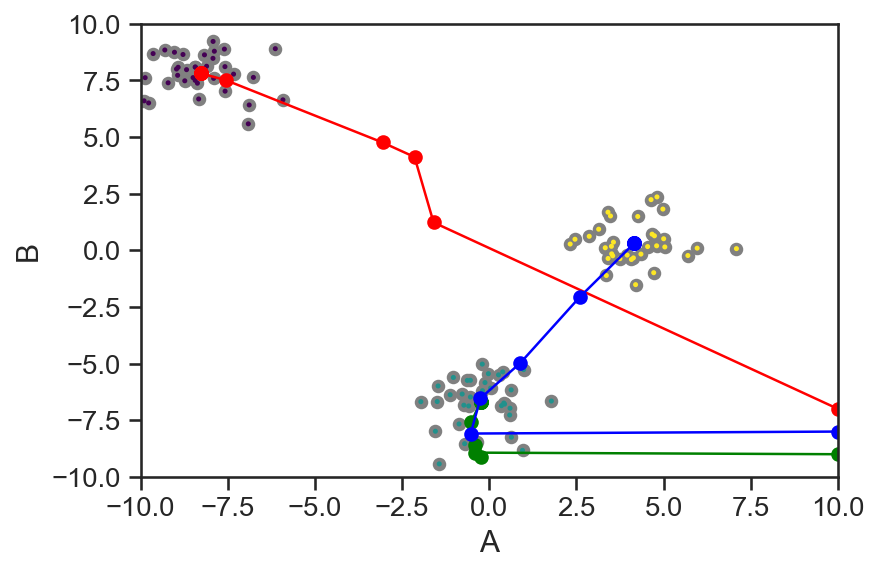

In [12]:
# Darstellung der Datenpunkte
plt.scatter(x[:,0], x[:,1], color='grey', s=30)
plt.scatter(x[:,0], x[:,1], c=cluster.labels_, s=2, cmap=cmap3)

# Darstellung des Suchpfads
plt.plot(centers[:,0,0], centers[:,0,1], '-o', color='red')
plt.plot(centers[:,1,0], centers[:,1,1], '-o', color='green')
plt.plot(centers[:,2,0], centers[:,2,1], '-o', color='blue')
    
# Beschriftung
plt.xlabel("A")
plt.ylabel("B")
plt.xlim([-10,10])
plt.ylim([-10,10]);

Die obige Darstellung kann für die weitere Verdeutlichung um eine Zuordnungskarte erweitert werden. 

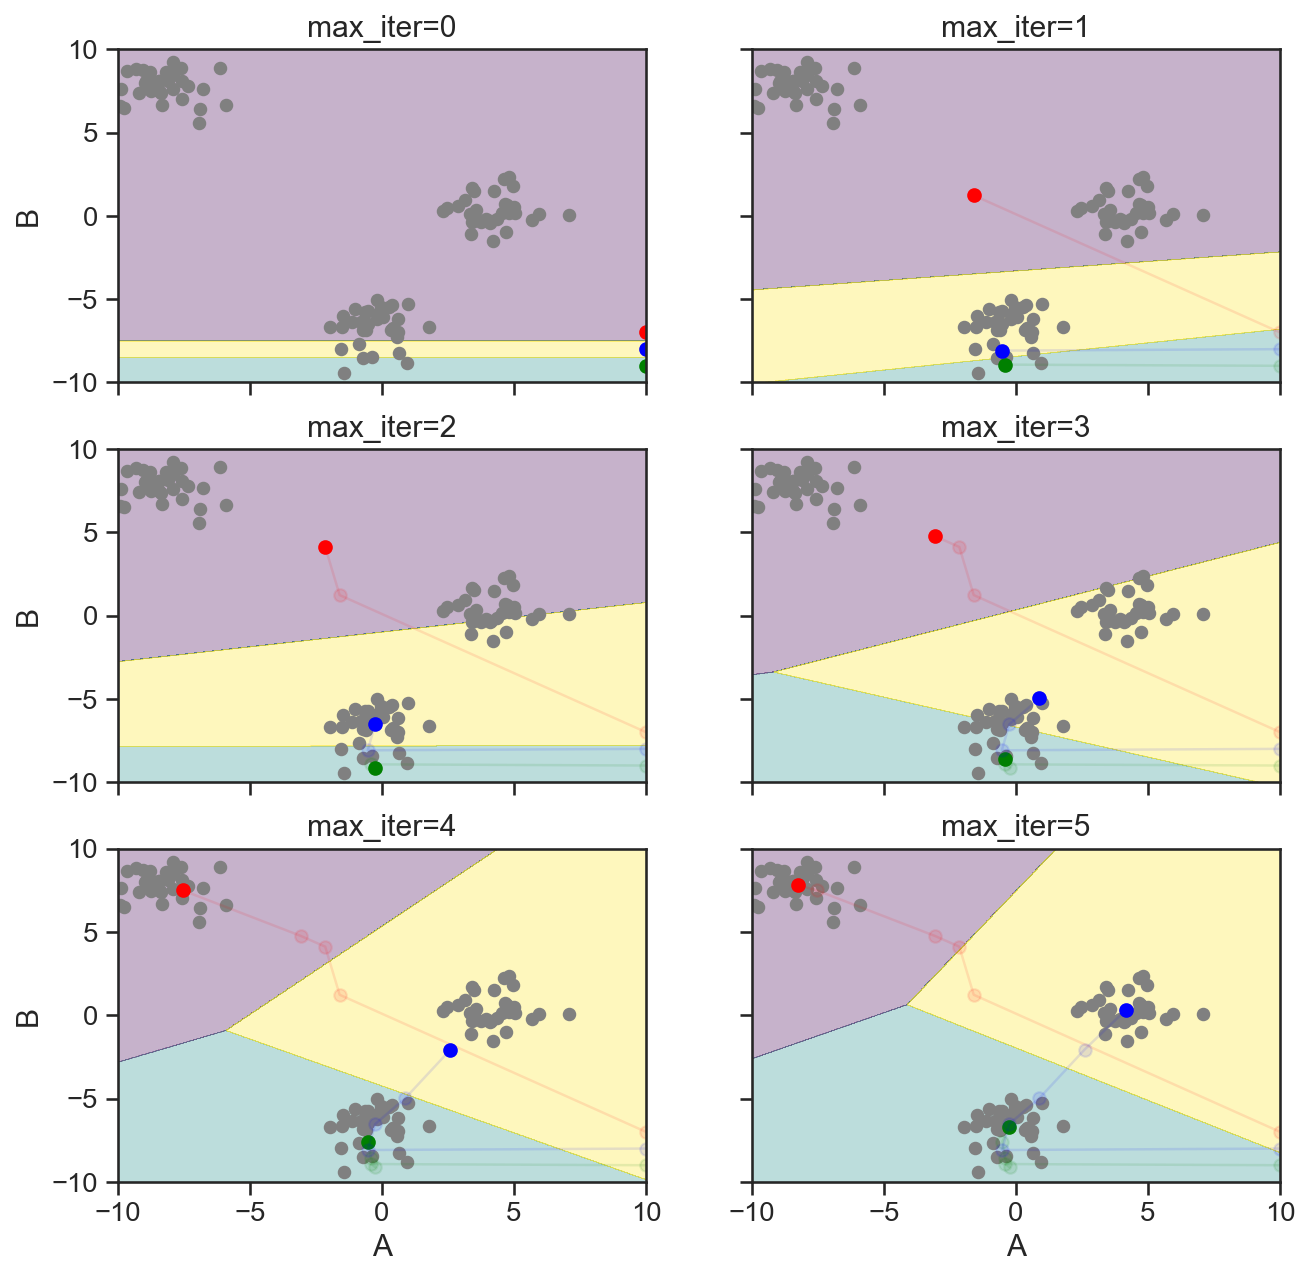

In [13]:
# Erstellung von einer Graphik mit mehreren Untergraphiken
fig, axs = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)
ax = axs.flat

# Schleife über alle darzustellenden Zustände
for t in range(6):
    
    # Erzeugung der Zuordnungskarte
    cluster = sklearn.cluster.KMeans(init=centers[t], n_clusters=3, 
                                 n_init=1, max_iter=t, verbose=False)
    cluster.cluster_centers_ = centers[t]
    cluster._n_threads=0
    z = cluster.predict(np.c_[mx.ravel(), my.ravel()])
    z = z.reshape(mx.shape)

    # Darstellung der Karte und der Datenpunkte
    ax[t].contourf(z, cmap=cmap3, extent=[-10,10,-10,10], alpha=0.3)
    ax[t].scatter(x[:,0], x[:,1], color='grey', s=30)

    # Darstellung der Clusterzentren und deren Verlauf
    ax[t].plot(centers[t,0,0], centers[t,0,1], 'o', color='red')
    ax[t].plot(centers[:t+1,0,0], centers[:t+1,0,1], '-o', color='red', alpha=0.1)
    ax[t].plot(centers[t,1,0], centers[t,1,1], '-o', color='green')
    ax[t].plot(centers[:t+1,1,0], centers[:t+1,1,1], '-o', color='green', alpha=0.1)
    ax[t].plot(centers[t,2,0], centers[t,2,1], '-o', color='blue')
    ax[t].plot(centers[:t+1,2,0], centers[:t+1,2,1], '-o', color='blue', alpha=0.1)

    # Beschriftung
    ax[t].set_title(f"max_iter={t}")
    ax[t].set_xlabel("A")
    ax[t].set_ylabel("B")
    ax[t].set_xlim([-10,10])
    ax[t].set_ylim([-10,10])

# Es sollen nur Achsenbeschriftungen, welche außen liegen, dargestellt werden
for cax in ax:
    cax.label_outer()
    

Bei dem k-Means-Algorithmus muss die Anzahl der zu suchenden Clusterzentren im Vorfeld festgelegt werden. Eine Möglichkeit um eine sinnvolle bzw. notwendige Anzahl der Cluster zu bestimmen liegt in der Betrachtung der Abstandsfunktion. Folgende Abbidlung zeigt diese als Funktion der Anzahl der Clusterzentren für das obige Beispiel.

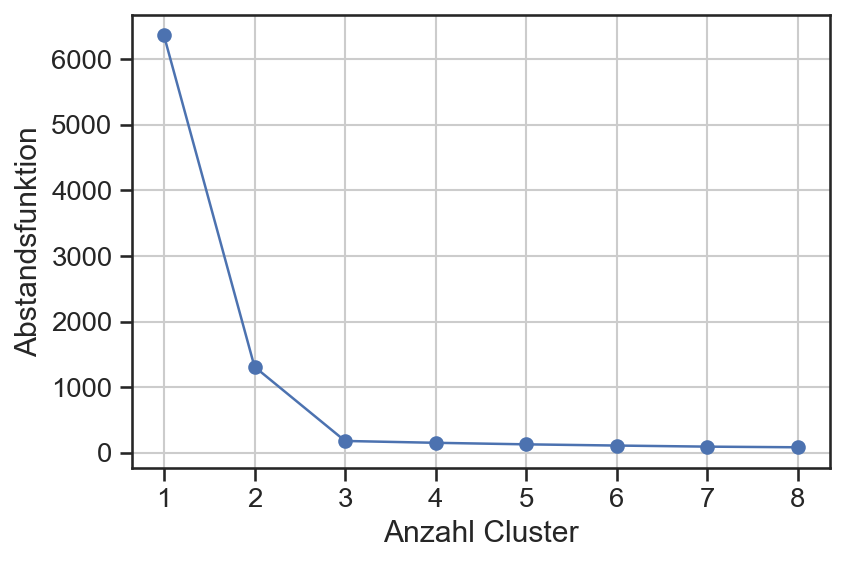

In [14]:
# Hier werden die Ergebnisse zwischengespeichert
abstand = []
ncluster = []

# Berechnung der Clusterzentren für verschiedene Anzahlen von Clusterzentren
for n in range(1, 9):
    cluster = sklearn.cluster.KMeans(n_clusters=n, random_state=145).fit(x)
    abstand.append(cluster.inertia_)
    ncluster.append(n)

# Graphische Darstellung
plt.plot(ncluster, abstand, '-o')
plt.grid()
plt.xlabel("Anzahl Cluster")
plt.ylabel("Abstandsfunktion");

In dieser Betrachtung wird deutlich, dass bis zur Wahl von drei Clustern die Abstandsfunktion deutlich sinkt in jedem Schritt. Danach, d.h. für mehr als drei Cluster, gibt es nur kleinere Verbesserungen. 

## Hierarchische Clusteranalyse

Ein anderen Ansatz zur Identifikation von Clustern sind sogenannte agglomerativen Verfahren. Sie stellen die Beziehung der Datenpunkte hierarchisch dar. Vereinfacht gesagt, werden bei dem Verfahren benachbarte Punkte zu einem Cluster zusammengefasst und dieses sukzessive um weitere Datenpunkte oder Cluster erweitert. Der so gernerierte Verbindungsgraph wird Dendrogramm genannt und stellt im Allgemeinen alle Informationen dar – für die praktische Anwendung werden nur die größeren Cluster betrachtet. 

Das Python Modul `sklearn` stellt als hieararchisches Verfahren die Klasse [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) zur Verfungung. Diese wird wie oben mit einigen spezifischen Parametern versort und dann mittels der `fit()` Funktion an die Datenpunkte angepasst.

In [15]:
agg = sklearn.cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Zur Verdeutlichung wird zunächst ein kleinerer Datensatz generiert und verwendent. Bei der graphischen Darstellung des Datensatzes werden auch noch die Indizes der Datenpunkte angegeben.

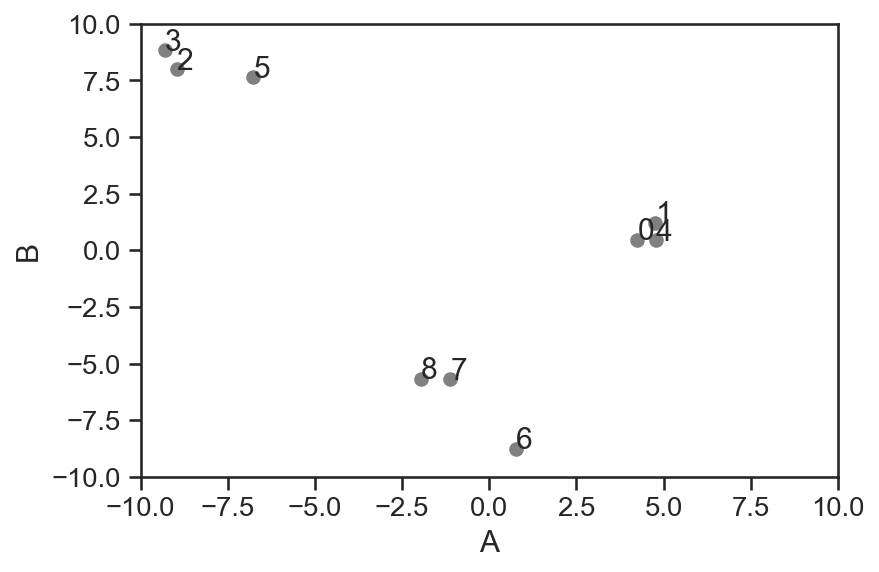

In [16]:
x_klein, c = sklearn.datasets.make_blobs(n_samples=9, random_state=144)

plt.scatter(x_klein[:,0], x_klein[:,1], color='grey')
for i in range(len(x_klein)):
    plt.text(x_klein[i,0], x_klein[i,1], str(i))

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel("A")
plt.ylabel("B");

In [23]:
agg.fit(x_klein)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [24]:
# Dies ist eine Hilfsfunktion um die Verknüpfungen in einem Dendrogramm darzustellen, 
# weche mit der AgglomerativeClustering Klasse bestimmt wurden
# Das Argumentpaar `truncate_mode="level", p=3` kann für eine Reduktion der Darstellung
# genutzt werden, diese Parameter werden an die Funktion 
# `scipy.cluster.hierarchy.dendrogram()` durchgereicht

def plot_dendrogram(model, **kwargs):

    # Bestimmung der Punkte für jeden Kindknoten
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Darstellung des Dendrograms
    scipy.cluster.hierarchy.dendrogram(linkage_matrix, **kwargs)

Das folgende Dendrogramm stellt die Verbindungen aller Datenpunkte dar. Je nach Wahl des Wertes für den Schwellwert des Abstands werden unterschiedliche Cluster identifiziert.

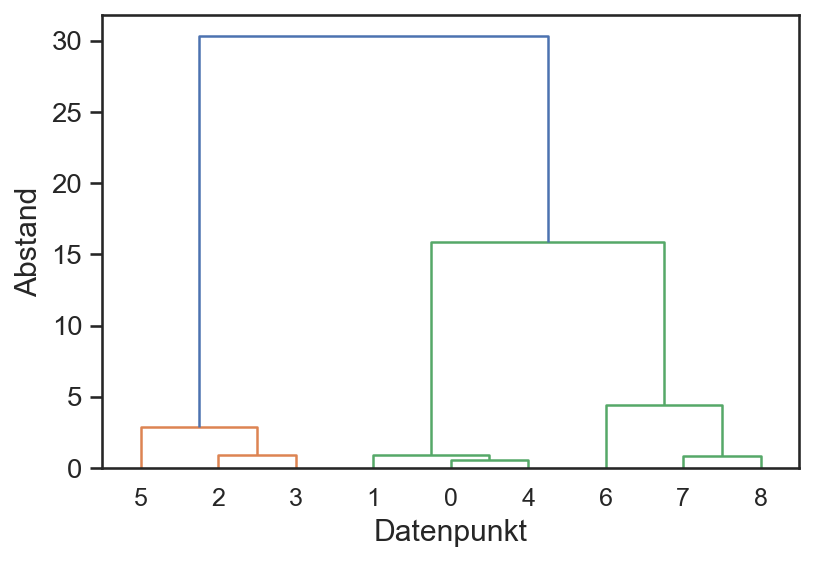

In [25]:
plot_dendrogram(agg)
plt.xlabel('Datenpunkt')
plt.ylabel('Abstand');

Die folgende Abbildung stellt die identifizierten Verknüpfungen für den ursprünglichen Datensatz dar, hier allerdings nur bis zur Stufe 3. Auf der x-Achse sind entweder die expliziten Knoten als Indizes der Datenpunkte dargestellt oder falls es ein Cluster von Punkten ist, die Anzahl der darin enthaltenen Punkte in runden Klammern. Die Anzahl und Zugehörigkeit der Datenpunkte kann bei diesem Verfahren auch nach dem Fitting bestimmt werden, je nachdem welcher Abstandswert in dem Dendrogramm gewählt wird. 

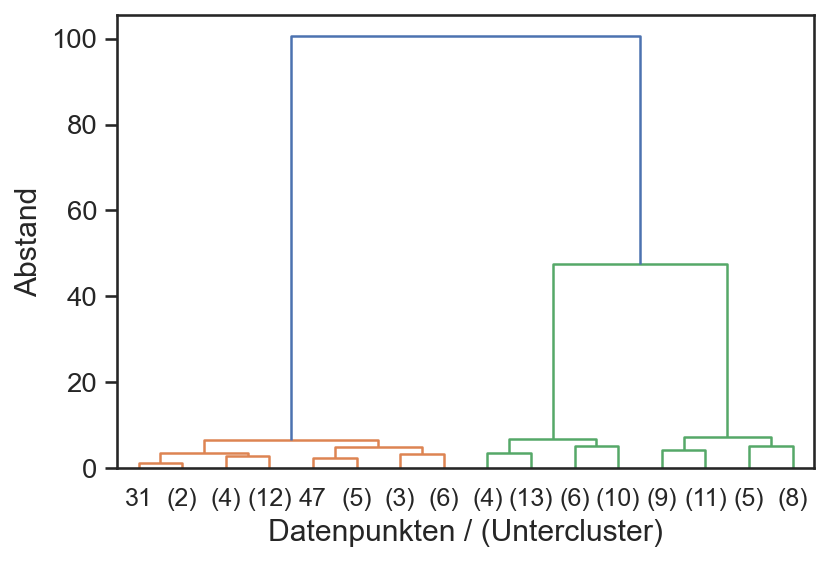

In [26]:
agg.fit(x)
plot_dendrogram(agg, truncate_mode="level", p=3)
plt.xlabel('Datenpunkten / (Untercluster)')
plt.ylabel('Abstand');

## Weitere Clusteralgorithmen

Je nach Anwendungsfall können die oben vorgestellten Verfahren gute, oder aber auch ganz schlechte Ergebnisse liefern. So existiert eine breite Palette an verschiedenen Verfahren, welche entsprechend andere Eigenschaften haben. Ein Vergleich der im `scikit` Modul [implementierten Algorithmen](https://scikit-learn.org/stable/modules/clustering.html) bei sehr unterschiedlichen Datensätzen ist in folgender Abbildung demonstriert.  

:::{figure-md} fig-scikit-clustering

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width="100%">

Vergleich verschiedener Clusteralgorithmen aus dem `scikit` Modul. Quelle: [`scikit` clustering comparison](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)
:::